목차

- 소개
- 데이터 및 라이브러리 불러오기
- 데이터 확인하기
- EDA
- 데이터 저장
- 데이터 분할
- 모델 학습
- 모델 평가
- 결과 해석

- Reference

## 카드 사기 탐지


### 소개
2013년도 9월 유럽에서 발생한 거래데이터로 2일간 발생한 거래 284,807건의 거래들 중 492건의 사기 거래 발생 건의 정보를 포함하고 있다. 그렇기에 target인 사기 거래 여부가 극단적으로 한쪽에 치우친 데이터셋이다. 

### 데이터셋 및 분석 패키지 불러오기

#### 분석 패키지

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

#### 데이터 불러오기

In [3]:
df = pd.read_csv("creditcard.csv")

df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


위 데이터는 V1 ~ 28, Amount, Class, Time 이렇게 31가지 column들로 구성된 데이터셋으로

Time은 집계시작부터 거래 발생한 당시 시간을 1초 단위로 기록한 변수

V1부터 V28은 PCA 과정을 거쳐 차원 축소된 변수

Amount는 의미상 거래에서 발생한 금액을 나타낸 변수로 해석

#### 데이터 확인하기

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# 결측값 확인
count_na = df.isna().sum()

count_na

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

target의 분포 확인하기

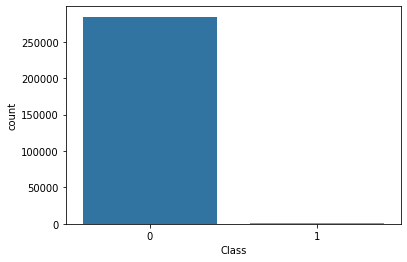

In [6]:
sns.countplot(x='Class', data=df)

In [7]:
# target의 비율 확인하기
t = len(df[df['Class'] == 1])

t_ratio = t/len(df) *100
print('전체 거래 중 사기 거래가 발생 비율은 {0}%이다.'.format(np.round(t_ratio,3)))

전체 거래 중 사기 거래가 발생 비율은 0.173%이다.


추후 분석을 진행하기 전에 극단적으로 쏠린 분포를 조정.

시간대 별 Fraud 발생 건수

In [8]:
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

[Text(0.5, 1.0, 'Fraud Transaction')]

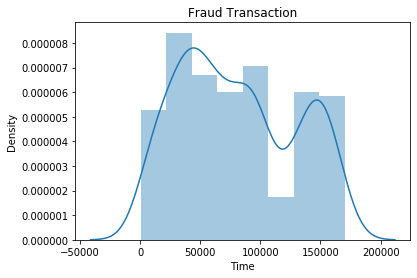

In [9]:
sns.distplot(class_1).set(title='Fraud Transaction')

[Text(0.5, 1.0, 'Transaction')]

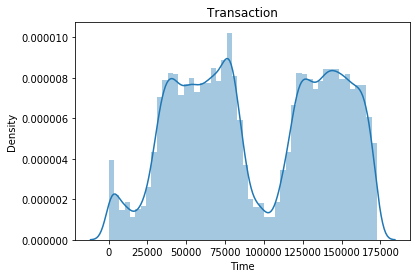

In [10]:
sns.distplot(class_0).set(title='Transaction')

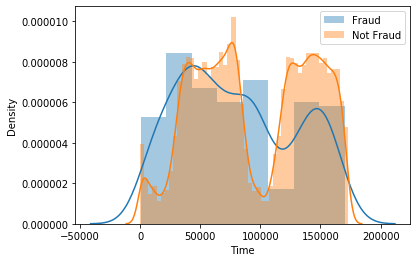

In [11]:
sns.distplot(class_1, label='Fraud')
sns.distplot(class_0, label='Not Fraud')

plt.legend()

위 분포의 차이 설명하기

V1~ V28 분포 확인하기

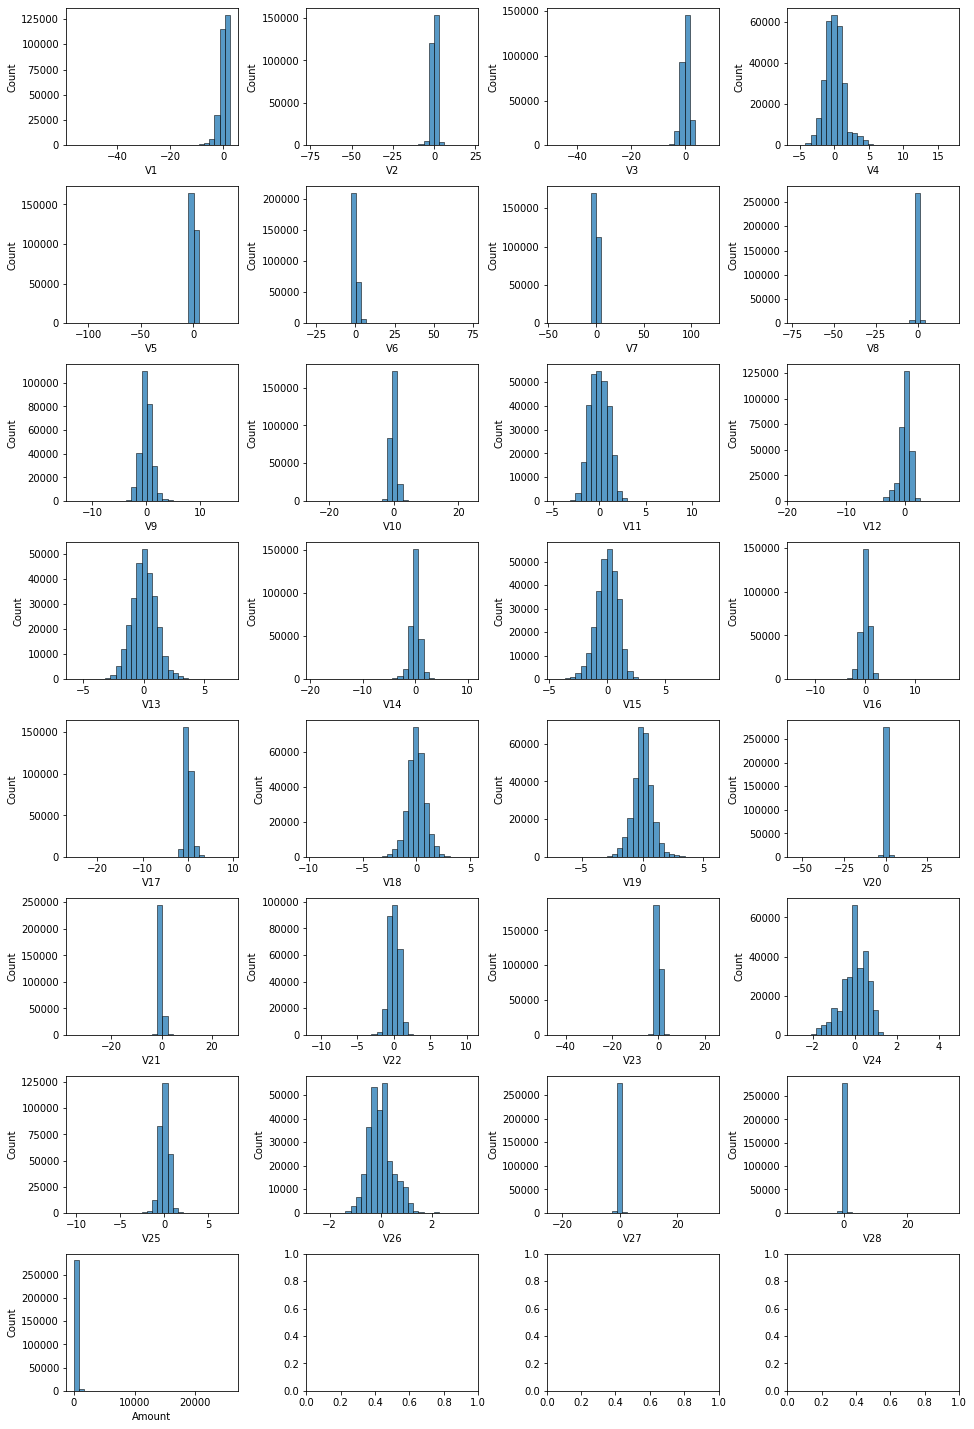

In [12]:
fig, axes = plt.subplots(8,4, figsize=(16,24))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.3)

sns.histplot(x='V1', bins=30, data=df, ax=axes[0,0])
sns.histplot(x='V2', bins=30, data=df, ax=axes[0,1])
sns.histplot(x='V3', bins=30, data=df, ax=axes[0,2])
sns.histplot(x='V4', bins=30, data=df, ax=axes[0,3])
sns.histplot(x='V5', bins=30, data=df, ax=axes[1,0])
sns.histplot(x='V6', bins=30, data=df, ax=axes[1,1])
sns.histplot(x='V7', bins=30, data=df, ax=axes[1,2])
sns.histplot(x='V8', bins=30, data=df, ax=axes[1,3])
sns.histplot(x='V9', bins=30, data=df, ax=axes[2,0])
sns.histplot(x='V10', bins=30, data=df, ax=axes[2,1])
sns.histplot(x='V11', bins=30, data=df, ax=axes[2,2])
sns.histplot(x='V12', bins=30, data=df, ax=axes[2,3])
sns.histplot(x='V13', bins=30, data=df, ax=axes[3,0])
sns.histplot(x='V14', bins=30, data=df, ax=axes[3,1])
sns.histplot(x='V15', bins=30, data=df, ax=axes[3,2])
sns.histplot(x='V16', bins=30, data=df, ax=axes[3,3])
sns.histplot(x='V17', bins=30, data=df, ax=axes[4,0])
sns.histplot(x='V18', bins=30, data=df, ax=axes[4,1])
sns.histplot(x='V19', bins=30, data=df, ax=axes[4,2])
sns.histplot(x='V20', bins=30, data=df, ax=axes[4,3])
sns.histplot(x='V21', bins=30, data=df, ax=axes[5,0])
sns.histplot(x='V22', bins=30, data=df, ax=axes[5,1])
sns.histplot(x='V23', bins=30, data=df, ax=axes[5,2])
sns.histplot(x='V24', bins=30, data=df, ax=axes[5,3])
sns.histplot(x='V25', bins=30, data=df, ax=axes[6,0])
sns.histplot(x='V26', bins=30, data=df, ax=axes[6,1])
sns.histplot(x='V27', bins=30, data=df, ax=axes[6,2])
sns.histplot(x='V28', bins=30, data=df, ax=axes[6,3])
sns.histplot(x='Amount', bins=30, data=df, ax=axes[7,0])
plt.show()

Scaling을 적용하였으나 이상치가 여전히 존재하는 것을 확인 따라서 이상치 데이터를 제거하는 방향으로 진행

#### 이상치 제외

이상치를 IQR * 17 범위를 벗어난 값으로 정의하고 그 값들은 제외 (일반적으로 1.5 * IQR 범위를 벗어난 값을 이상치로 정함)

17으로 지정한 이유는 17미만의 데이터셋에서 Fraud인 데이터도 많이 제외됨. 따라서 전체 Fraud 비율의 5% 이내로 제외되도록 조정 

분포들 중 기울기가 강한 분포를 우선으로 순차적으로 이상치 제외 (Amount - V5 - V1 - V2 - V7 - V6 - V8 순으로 진행) 

In [15]:
q1 = df[scaled_cols].quantile(.25)
q3 = df[scaled_cols].quantile(.75)

iqr = q3-q1
lower_range = q1 - (iqr * 17)
upper_range = q3 + (iqr * 17)

In [16]:
t_data = df.copy()

outlier_1 = t_data[t_data['Amount']>upper_range[-1]].index
t_data.drop(outlier_1, axis=0, inplace=True)

outlier_2 = t_data[t_data['V5']<lower_range[4]].index
t_data.drop(outlier_2, axis=0, inplace=True)

outlier_3 = t_data[t_data['V1']<lower_range[0]].index
t_data.drop(outlier_3, axis=0, inplace=True)

outlier_4 = t_data[t_data['V2']<lower_range[1]].index
t_data.drop(outlier_4, axis=0, inplace=True)

outlier_5 = t_data[t_data['V7']>upper_range[6]].index
t_data.drop(outlier_5, axis=0, inplace=True)

outlier_6 = t_data[t_data['V6']>upper_range[5]].index
t_data.drop(outlier_6, axis=0, inplace=True)

outlier_7 = t_data[t_data['V8']<lower_range[7]].index
t_data.drop(outlier_7, axis=0, inplace=True)

In [17]:
# 제거된 이상치 수
outlier = len(df) - len(t_data)

print('제외된 이상치 수 : {0}\n, 제외된 이상치 비율 : {1}'.format(outlier, np.round(outlier/len(df),2)))

제외된 이상치 수 : 2509
, 제외된 이상치 비율 : 0.01


In [18]:
# 이상치로 밝혀진 Fraud 수
count_out_fraud = t_data[t_data['Class']==1]
f1 = len(count_out_fraud)
f1

465

In [19]:
# 이상치 전에 밝혀진 Fraud 수
count_fraud = df[df['Class']==1]
f2 =len(count_fraud)
f2

492

In [20]:
# 이상치 제거로 없어진 Fraud 수와 전체 Fraud 비율
print('제외된 Fraud 수 : {0}'.format(f2 - f1))
print('제외된 Fraud 비율 : {0}%'.format(np.round((f2 - f1)/f2,2)))

제외된 Fraud 수 : 27
제외된 Fraud 비율 : 0.05%


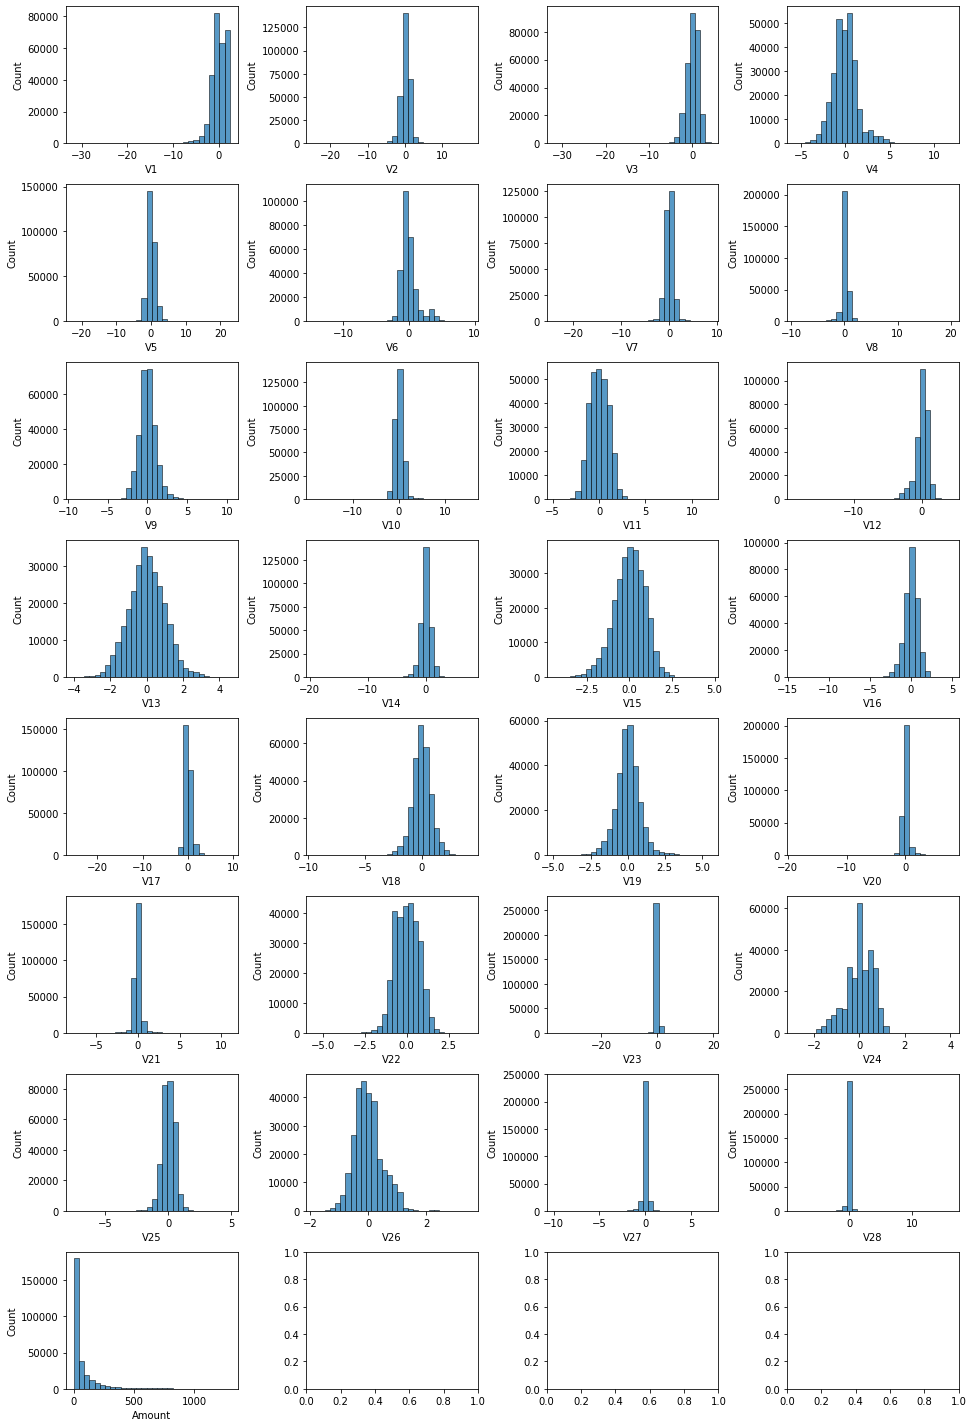

In [21]:
fig, axes = plt.subplots(8,4, figsize=(16,24))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.3)

sns.histplot(x='V1', bins=30, data=t_data, ax=axes[0,0])
sns.histplot(x='V2', bins=30, data=t_data, ax=axes[0,1])
sns.histplot(x='V3', bins=30, data=t_data, ax=axes[0,2])
sns.histplot(x='V4', bins=30, data=t_data, ax=axes[0,3])
sns.histplot(x='V5', bins=30, data=t_data, ax=axes[1,0])
sns.histplot(x='V6', bins=30, data=t_data, ax=axes[1,1])
sns.histplot(x='V7', bins=30, data=t_data, ax=axes[1,2])
sns.histplot(x='V8', bins=30, data=t_data, ax=axes[1,3])
sns.histplot(x='V9', bins=30, data=t_data, ax=axes[2,0])
sns.histplot(x='V10', bins=30, data=t_data, ax=axes[2,1])
sns.histplot(x='V11', bins=30, data=t_data, ax=axes[2,2])
sns.histplot(x='V12', bins=30, data=t_data, ax=axes[2,3])
sns.histplot(x='V13', bins=30, data=t_data, ax=axes[3,0])
sns.histplot(x='V14', bins=30, data=t_data, ax=axes[3,1])
sns.histplot(x='V15', bins=30, data=t_data, ax=axes[3,2])
sns.histplot(x='V16', bins=30, data=t_data, ax=axes[3,3])
sns.histplot(x='V17', bins=30, data=t_data, ax=axes[4,0])
sns.histplot(x='V18', bins=30, data=t_data, ax=axes[4,1])
sns.histplot(x='V19', bins=30, data=t_data, ax=axes[4,2])
sns.histplot(x='V20', bins=30, data=t_data, ax=axes[4,3])
sns.histplot(x='V21', bins=30, data=t_data, ax=axes[5,0])
sns.histplot(x='V22', bins=30, data=t_data, ax=axes[5,1])
sns.histplot(x='V23', bins=30, data=t_data, ax=axes[5,2])
sns.histplot(x='V24', bins=30, data=t_data, ax=axes[5,3])
sns.histplot(x='V25', bins=30, data=t_data, ax=axes[6,0])
sns.histplot(x='V26', bins=30, data=t_data, ax=axes[6,1])
sns.histplot(x='V27', bins=30, data=t_data, ax=axes[6,2])
sns.histplot(x='V28', bins=30, data=t_data, ax=axes[6,3])
sns.histplot(x='Amount', bins=30, data=t_data, ax=axes[7,0])
plt.show()

### EDA

Class 값의 차이가 다른 변수들과의 분포에 영향을 미치는 지 확인

In [22]:
c0 = t_data.loc[t_data['Class']==0] # Not Fraud
c1 = t_data.loc[t_data['Class']==1] #  Fraud

features = t_data.drop(['Class'], axis=1).columns

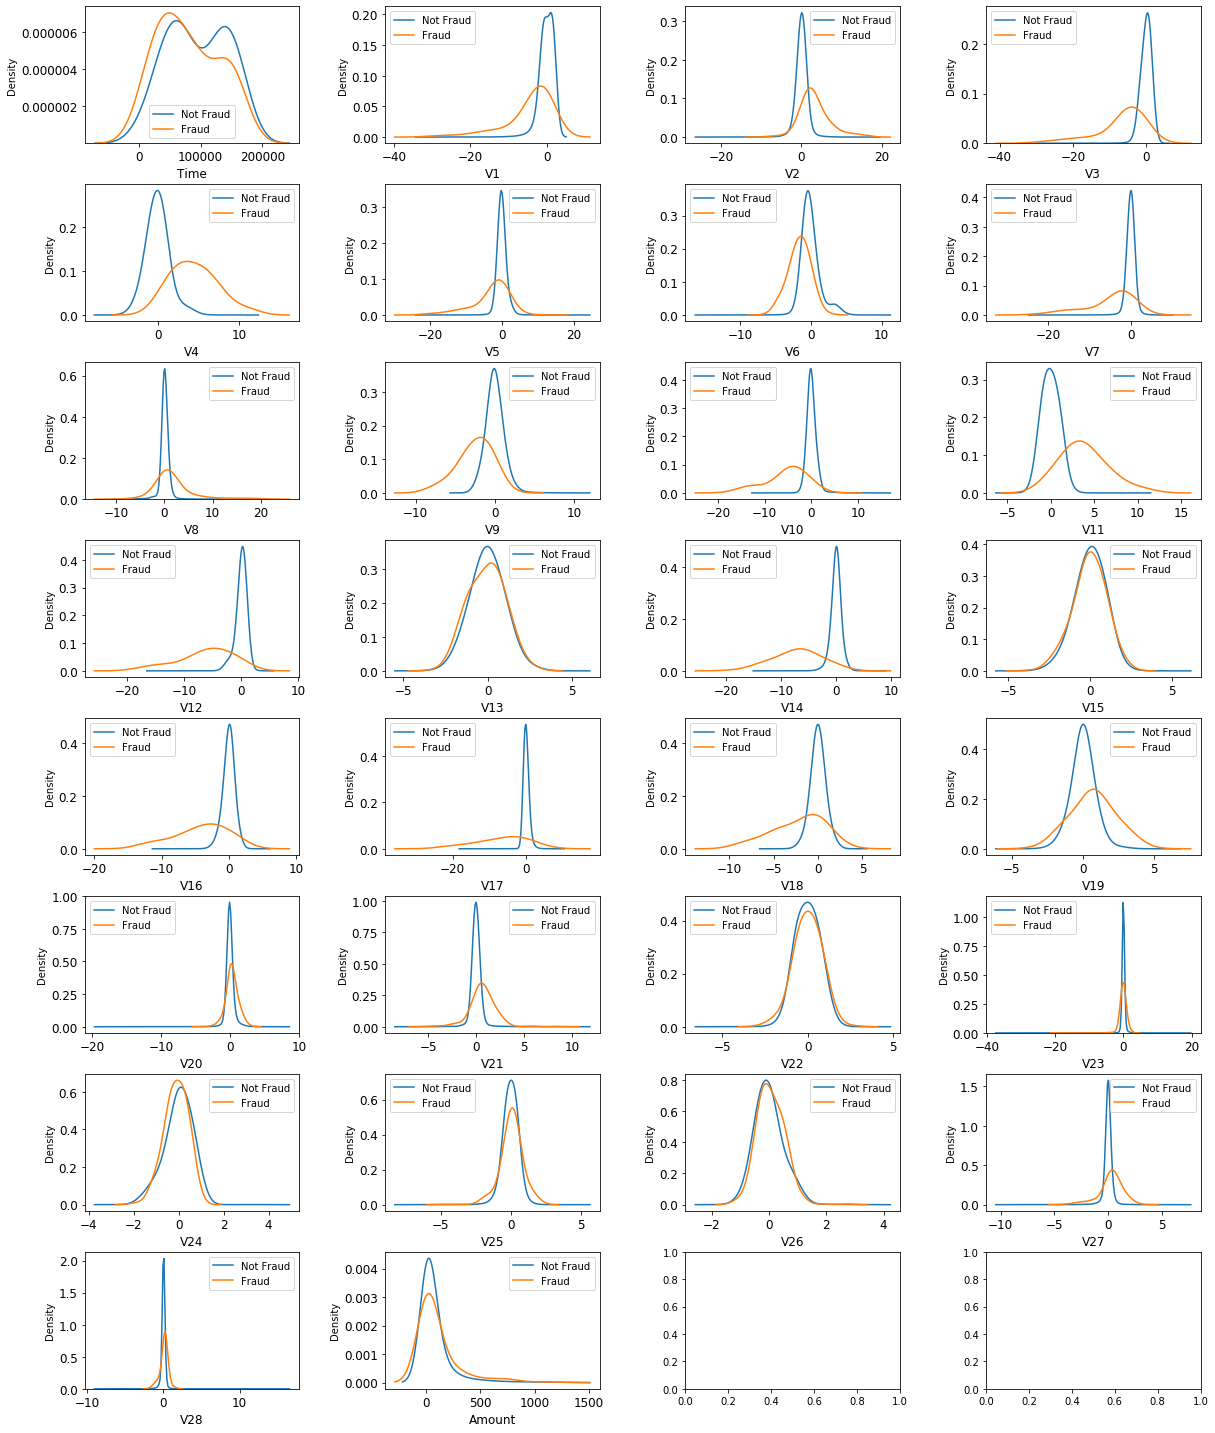

In [23]:
i = 0
fig, axes = plt.subplots(8,4, figsize=(20,24))
    
for feature in features:
    i += 1
    plt.subplot(8,4,i)
    plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.3)
    
    sns.kdeplot(c0[feature], bw=0.5,label="Not Fraud")
    sns.kdeplot(c1[feature], bw=0.5,label="Fraud")
    
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    plt.legend(fontsize=10)
plt.show()

Class 값의 차이가 다른 변수들의 분포에 영향을 미치는 것을 확인.

#### 저장하기

In [33]:
t_data.to_csv('fraud_detect.csv',index=None)

Target의 비균등한 값의 차이를 SMOTE 오버 샘플링을 적용한 후 모델 학습 및 예측 진행

In [25]:
from imblearn.over_sampling import SMOTE

X = t_data.iloc[:,:-1]
y = t_data.iloc[:,-1]

X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [42]:
a = pd.Series(y_resampled)

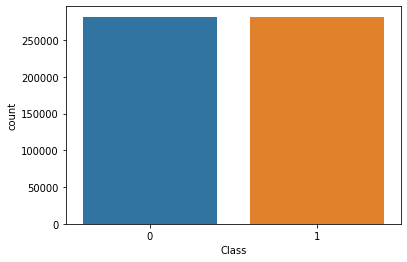

In [44]:
sns.countplot(a)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=1234)

In [51]:
from sklearn.metrics import accuracy_score, roc_auc_score

### 머신 러닝 모델

- Random Forest
- Logistic Regression
- XGBoost
- Gradient Boost

#### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier()

rand_clf.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
pred = rand_clf.predict(X_test)
acc = accuracy_score(y_test, pred)
auc = roc_auc_score(y_test, pred)

print("랜덤포레스트 예측 정확도 : {0:.4f}".format(acc))
print("랜덤포레스트 AUC 값 : {0:.4f}".format(auc))

랜덤포레스트 예측 정확도 : 0.9998
랜덤포레스트 AUC 값 : 0.9998


랜덤 포레스트 변수 중요도

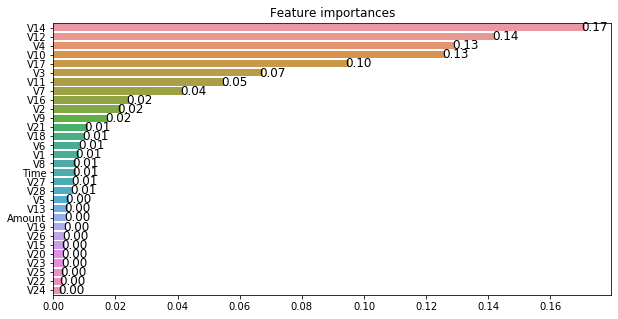

In [64]:
x_train_columns = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

feature_imp_values = rand_clf.feature_importances_
ftr_imp = pd.Series(feature_imp_values, index=x_train_columns)
ftr_top1 = ftr_imp.sort_values(ascending=False)

plt.figure(figsize=(10,5))
plt.title("Feature importances")
plot = sns.barplot(x=ftr_top1, y = ftr_top1.index)

ax = plot
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
               ha='center', va = 'center', fontsize=12, xytext=(10,0), color='black',textcoords='offset points')

#### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression()

logistic_clf.fit(X_train, y_train)

LogisticRegression()

In [66]:
pred = logistic_clf.predict(X_test)
acc = accuracy_score(y_test, pred)
auc = roc_auc_score(y_test, pred)

print("Logistic Regression 예측 정확도 : {0:.4f}".format(acc))
print("Logistic Regression AUC 값 : {0:.4f}".format(auc))

Logistic Regression 예측 정확도 : 0.9721
Logistic Regression AUC 값 : 0.9721


#### XGBoost

In [68]:
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance

xgb_clf = XGBClassifier()

# 데이터 학습
xgb_clf.fit(X_train, y_train)

[19:00:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
pred = xgb_clf.predict(X_test)
acc = accuracy_score(y_test, pred)
auc = roc_auc_score(y_test, pred)

print("XGBoost 예측 정확도 : {0:.4f}".format(acc))
print("XGBoost AUC 값 : {0:.4f}".format(auc))

XGBoost 예측 정확도 : 0.9998
XGBoost AUC 값 : 0.9998


XGBoost 변수 중요도

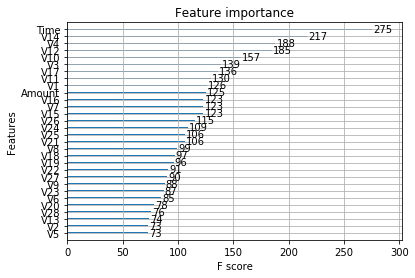

In [70]:
plot_importance(xgb_clf)

#### Gradient Boost

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

grad_clf = GradientBoostingClassifier()

# 데이터 학습
grad_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [72]:
pred = grad_clf.predict(X_test)
acc = accuracy_score(y_test, pred)
auc = roc_auc_score(y_test, pred)

print("Gradient Boost 예측 정확도 : {0:.4f}".format(acc))
print("Gradient Boost AUC 값 : {0:.4f}".format(auc))

Gradient Boost 예측 정확도 : 0.9871
Gradient Boost AUC 값 : 0.9871


### Reference

[1] https://www.kaggle.com/code/gpreda/credit-card-fraud-detection-predictive-models#Check-the-data

[2] https://imbalanced-learn.org/stable/over_sampling.html